In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [ ]:
df = tf.keras.datasets.cifar10

In [ ]:
(train_images, train_labels), (test_images, test_labels) = df.load_data()

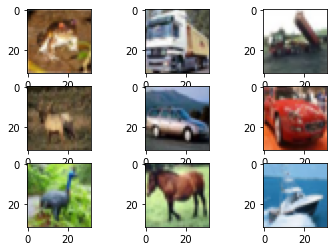

In [ ]:
for i in range(0,9):
  plt.subplot(330+1+i)
  plt.imshow(train_images[i])

In [ ]:
print('TRAINING DATA: ', train_images.shape, train_labels.shape)
print('TESTING DATA: ', test_images.shape, test_labels.shape)

TRAINING DATA:  (50000, 32, 32, 3) (50000, 1)
TESTING DATA:  (10000, 32, 32, 3) (10000, 1)


In [ ]:
train_images = train_images.reshape(train_images.shape[0], 32,32,3)
test_images = test_images.reshape(test_images.shape[0], 32,32,3)

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(32,32,3)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 411,146
Trainable params: 411,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=25)

Epoch 1/25
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8636 - accuracy: 0.3265
Epoch 2/25
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6866 - accuracy: 0.3950
Epoch 3/25
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6114 - accuracy: 0.4224
Epoch 4/25
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5687 - accuracy: 0.4375
Epoch 5/25
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5359 - accuracy: 0.4509
Epoch 6/25
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5121 - accuracy: 0.4626
Epoch 7/25
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4928 - accuracy: 0.4659
Epoch 8/25
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4735 - accuracy: 0.4749
Epoch 9/25
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4576 - accuracy: 0.4803
Epoch 10/25
1563/1563 [==============================] - 3s 2ms/step - loss: 1.442

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.4705 - accuracy: 0.4857


[1.4705100059509277, 0.48570001125335693]

Text(0, 0.5, 'loss')

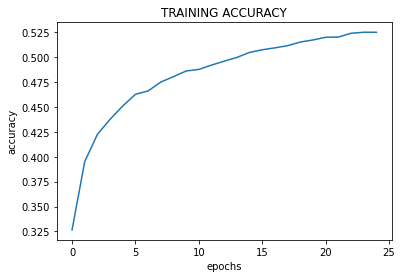

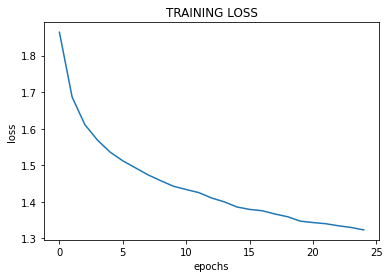

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.title('TRAINING ACCURACY')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.title('TRAINING LOSS')
plt.xlabel('epochs')
plt.ylabel('loss')

In [ ]:
pred = model.predict(test_images)
pred = [np.argmax(x) for x in pred]

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,pred))

              precision    recall  f1-score   support

           0       0.59      0.56      0.57      1000
           1       0.68      0.47      0.56      1000
           2       0.41      0.30      0.35      1000
           3       0.35      0.24      0.29      1000
           4       0.48      0.42      0.45      1000
           5       0.36      0.52      0.42      1000
           6       0.40      0.69      0.51      1000
           7       0.63      0.46      0.53      1000
           8       0.69      0.52      0.59      1000
           9       0.48      0.68      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.48     10000
weighted avg       0.51      0.49      0.48     10000



In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
cmr = confusion_matrix(test_labels,pred)
print(cmr)

[[557  27  74  27  21  48  47  20  85  94]
 [ 50 474  20  25  12  36  36  10  53 284]
 [ 52  19 299  60 134 139 203  51  10  33]
 [ 19  11  61 240  44 292 231  32  17  53]
 [ 37   9  91  44 420  90 205  65  12  27]
 [ 15   9  44 140  43 522 154  37   7  29]
 [  5   4  39  40  92  89 688  13   7  23]
 [ 27   4  46  56  83 160  76 459  10  79]
 [143  43  33  19  17  56  33  11 521 124]
 [ 38  94  17  30   8  35  40  26  35 677]]


In [ ]:
cnn_model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(216, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)        

In [ ]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
cnn_history = cnn_model.fit(train_images, train_labels, epochs=20, validation_split=0.2, callbacks = tf.keras.callbacks.EarlyStopping())

Epoch 1/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6208 - accuracy: 0.4004 - val_loss: 1.3237 - val_accuracy: 0.5321
Epoch 2/20
1250/1250 [==============================] - 4s 4ms/step - loss: 1.2639 - accuracy: 0.5479 - val_loss: 1.1301 - val_accuracy: 0.6067
Epoch 3/20
1250/1250 [==============================] - 4s 4ms/step - loss: 1.1272 - accuracy: 0.5991 - val_loss: 1.0341 - val_accuracy: 0.6371
Epoch 4/20
1250/1250 [==============================] - 4s 4ms/step - loss: 1.0390 - accuracy: 0.6327 - val_loss: 0.9386 - val_accuracy: 0.6752
Epoch 5/20
1250/1250 [==============================] - 4s 4ms/step - loss: 0.9685 - accuracy: 0.6593 - val_loss: 0.8625 - val_accuracy: 0.7021
Epoch 6/20
1250/1250 [==============================] - 4s 4ms/step - loss: 0.9221 - accuracy: 0.6768 - val_loss: 0.8745 - val_accuracy: 0.6914


In [ ]:
cnn_model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.8916 - accuracy: 0.6861


[0.8915593028068542, 0.6861000061035156]

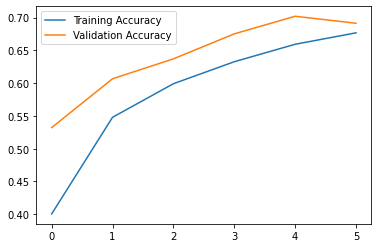

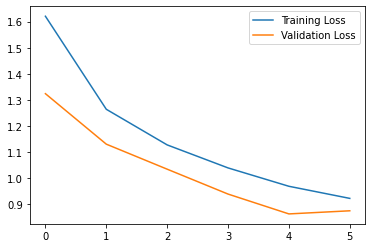

In [ ]:
cnn_acc = cnn_history.history['accuracy']
cnn_loss = cnn_history.history['loss']
cnn_val_acc = cnn_history.history['val_accuracy']
cnn_val_loss = cnn_history.history['val_loss']

cnn_epochs = range(len(cnn_acc))

plt.plot(cnn_epochs, cnn_acc, label='Training Accuracy')
plt.plot(cnn_epochs, cnn_val_acc, label='Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(cnn_epochs, cnn_loss, label='Training Loss')
plt.plot(cnn_epochs, cnn_val_loss, label='Validation Loss')
plt.legend()

In [ ]:
import numpy as np
p = cnn_model.predict(test_images)
p = [np.argmax(x) for x in p]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_labels,p))

              precision    recall  f1-score   support

           0       0.82      0.59      0.69      1000
           1       0.83      0.82      0.83      1000
           2       0.51      0.67      0.57      1000
           3       0.59      0.41      0.49      1000
           4       0.64      0.62      0.63      1000
           5       0.64      0.60      0.62      1000
           6       0.64      0.86      0.74      1000
           7       0.84      0.66      0.74      1000
           8       0.68      0.89      0.77      1000
           9       0.80      0.75      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.68     10000
weighted avg       0.70      0.69      0.68     10000



In [ ]:
labels =['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
cmat=confusion_matrix(test_labels,p)
print(cmat)

[[591  22 108   5  28   3  19   3 198  23]
 [ 10 823   9   3   3   1  25   0  56  70]
 [ 34   7 665  38  71  43  97  13  23   9]
 [  9   6 134 412  60 180 133  19  28  19]
 [ 13   5 126  40 616  28 102  45  22   3]
 [  6   5 101 121  53 596  58  36  17   7]
 [  4   1  63  21  24  10 863   2   7   5]
 [ 12   6  70  41 100  59  19 656   6  31]
 [ 22  20  21   7   4   3  12   2 890  19]
 [ 23  95  19   9   9   5  19   8  64 749]]


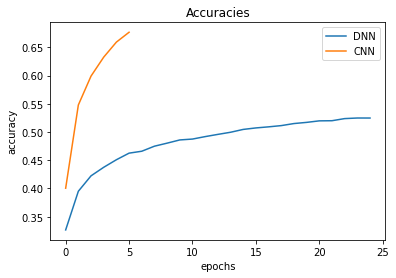

In [ ]:
plt.plot(acc, label='DNN')
plt.plot(cnn_acc, label='CNN')
plt.title('Accuracies')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

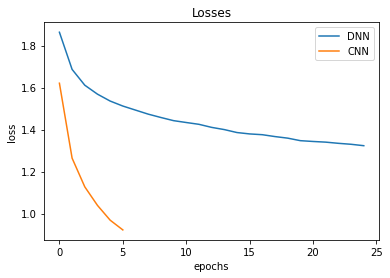

In [ ]:
plt.plot(loss, label='DNN')
plt.plot(cnn_loss, label='CNN')
plt.title('Losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
cnn_model.save('cnn.h5')

In [ ]:
!pip install streamlit

In [ ]:
!pip install pyngrok

In [ ]:
%%writefile result.py

import streamlit as st
import tensorflow as tf

st.set_option('deprecation.showfileUploaderEncoding',False) #ignores the streamlit warning
@st.cache(allow_output_mutation=True) #the model is loaded only once and stored in cache memory

def load_model():
  model = tf.keras.models.load_model('/content/cnn.h5')
  return model

model = load_model()

st.write("""
    CIFAR 10 
    """
) 

file = st.file_uploader('Please upload an image', type=['jpg','png']) 

import cv2
import PIL
from PIL import Image, ImageOps
import numpy as np

def import_and_predict(image_data, model):
  size = (32,32)
  image = ImageOps.fit(image_data, size, Image.ANTIALIAS) 
  img = np.asarray(image)
  img_reshape = img[np.newaxis,...] 
  prediction = model.predict(img_reshape)

  return prediction

if file is None:
  st.text('Please upload an image')
else:
  image = Image.open(file) 
  st.image(image, use_column_width=True) 
  predictions = import_and_predict(image, model) 
  class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
  string = class_names[np.argmax(predictions)]
  st.success(string)


Overwriting result.py


In [ ]:
!ngrok authtoken 1giXrhzoorZx3hNFxa5g77DBUlM_55mZXCznAWCo1eroZ57By

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!nohup streamlit run predict.py & 

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
link = ngrok.connect(port=8501) 
link

'http://f59bc7a58c12.ngrok.io'